In [1]:
import pandas as pd
diabetes_train = pd.read_csv('train/pima-indians-diabetes.csv')
diabetes_test = pd.read_csv('test/pima-indians-diabetes.csv')
diabetes_train.head()

,Number Pregnant,Glucose Concentration,Blood Pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,148,72,35,0,33.6,0.627,50,1,D
1,1,85,66,29,0,26.6,0.351,31,0,E
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,C
4,0,137,40,35,168,43.1,2.288,33,1,E


In [4]:
diabetes_train.columns
cols_to_norm = ['Number Pregnant', 'Glucose Concentration', 'Blood Pressure', 'Triceps', 'Insulin' , 'BMI', 'Pedigree']
diabetes_train[cols_to_norm] = diabetes_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes_test.columns
diabetes_test[cols_to_norm] = diabetes_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes_train.head()
#diabetes_test.head()

,Number Pregnant,Glucose Concentration,Blood Pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.747475,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,D
1,0.058824,0.429293,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,E
2,0.470588,0.924242,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.449495,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,C
4,0.000000,0.691919,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,E


In [5]:
import tensorflow as tf
num_preg = tf.feature_column.numeric_column('Number Pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose Concentration')
dias_press = tf.feature_column.numeric_column('Blood Pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

<AxesSubplot:>

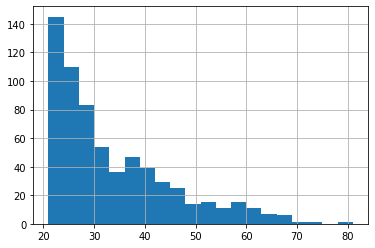

In [7]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D','E'])
import matplotlib.pyplot as plt
%matplotlib inline
diabetes_train['Age'].hist(bins=20)


In [13]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [14]:
x_data_train = diabetes_train.drop('Class',axis=1)
labels_train = diabetes_train['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_train,labels_train,test_size=0.33,random_state=101)

In [15]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jagumiel\\AppData\\Local\\Temp\\tmp9nr2npm1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initia

In [16]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jagumiel\AppData\Local\Temp\tmp9nr2npm1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.28316426], dtype=float32),
  'logistic': array([0.5703218], dtype=float32),
  'probabilities': array([0.42967817, 0.5703218 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.2863398], dtype=float32),
  'logistic': array([0.21647298], dtype=float32),
  'probabilities': array([0.783527, 0.216473], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.2668774], dtype=float32),
  'logistic': array([0.21979225], dtype=float32),
  'probabilities': array([0.78020775, 0.21979226], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'

In [17]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results=model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-13T09:47:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jagumiel\AppData\Local\Temp\tmp9nr2npm1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51762s
INFO:tensorflow:Finished evaluation at 2021-01-13-09:47:06
INFO:tensorflow:Saving dict for global step 100

{'accuracy': 0.73023254,
 'accuracy_baseline': 0.66511625,
 'auc': 0.7735528,
 'auc_precision_recall': 0.5976133,
 'average_loss': 0.5380436,
 'label/mean': 0.33488372,
 'loss': 0.53659576,
 'precision': 0.64,
 'prediction/mean': 0.33980405,
 'recall': 0.44444445,
 'global_step': 1000}

In [18]:
x_data_test = diabetes_test.drop('Class',axis=1)
labels_test = diabetes_test['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_train,labels_train,test_size=0.75,random_state=101)


eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results=model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-13T09:47:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jagumiel\AppData\Local\Temp\tmp9nr2npm1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.58653s
INFO:tensorflow:Finished evaluation at 2021-01-13-09:47:17
INFO:tensorflow:Saving dict for global step 100

{'accuracy': 0.7602459,
 'accuracy_baseline': 0.6577869,
 'auc': 0.7961647,
 'auc_precision_recall': 0.6653,
 'average_loss': 0.52358043,
 'label/mean': 0.34221312,
 'loss': 0.5233023,
 'precision': 0.72321427,
 'prediction/mean': 0.3392083,
 'recall': 0.48502994,
 'global_step': 1000}